# Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [30]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [2]:
tesla = yf.Ticker("TSLA")

In [41]:
tesla_data = tesla.history(period="1000y")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.



In [20]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url)
print(data.content)

soup = BeautifulSoup(data.content, 'html.parser')

tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

tesla_revenue.tail()

b'<html>\r\n<head>\r\n\n</head>\r\n<body>\r\n<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">\r\n\r\n<h1>We do not allow automated access to our servers.</h1>\r\n<h2><p>Automated access to our data is prohibited by our data provider.</p>  \r\n<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>\r\n\r\n<ul>\r\n  <li>Go to <a href=\'https://whatismyipaddress.com/\' target=\'_blank\' rel=\'noopener noreferrer\'>whatismyipaddress</a> and obtain your IPv4 address</li>\r\n  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>\r\n  <li>We will add you to our whitelist within 24 hours</li>\r\n</ul>\r\n</h2>\r\n</div>\r\n<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"e

IndexError: list index out of range

In [21]:
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
248,2024-10-24 00:00:00-04:00,244.679993,262.119995,242.649994,260.480011,204491900,0.0,0.0
249,2024-10-25 00:00:00-04:00,256.010010,269.489990,255.320007,269.190002,161611900,0.0,0.0
250,2024-10-28 00:00:00-04:00,270.000000,273.540009,262.239990,262.510010,107653600,0.0,0.0
251,2024-10-29 00:00:00-04:00,264.510010,264.980011,255.509995,259.519989,80333700,0.0,0.0
252,2024-10-30 00:00:00-04:00,258.035004,260.749908,255.820099,259.659912,11910954,0.0,0.0


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [40]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1000y")
tesla_data.reset_index(inplace=True)
tesla_data.head()

gme = yf.Ticker("GME")
gme_data = gme.history(period="1000y")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [25]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
data = requests.get(url)
print(data.content)

soup = BeautifulSoup(data.content, 'html.parser')

gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index = True)
    
gme_revenue.tail()

b'<html>\r\n<head>\r\n\n</head>\r\n<body>\r\n<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">\r\n\r\n<h1>We do not allow automated access to our servers.</h1>\r\n<h2><p>Automated access to our data is prohibited by our data provider.</p>  \r\n<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>\r\n\r\n<ul>\r\n  <li>Go to <a href=\'https://whatismyipaddress.com/\' target=\'_blank\' rel=\'noopener noreferrer\'>whatismyipaddress</a> and obtain your IPv4 address</li>\r\n  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>\r\n  <li>We will add you to our whitelist within 24 hours</li>\r\n</ul>\r\n</h2>\r\n</div>\r\n<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"e

IndexError: list index out of range

## Question 5: Plot Tesla Stock Data
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

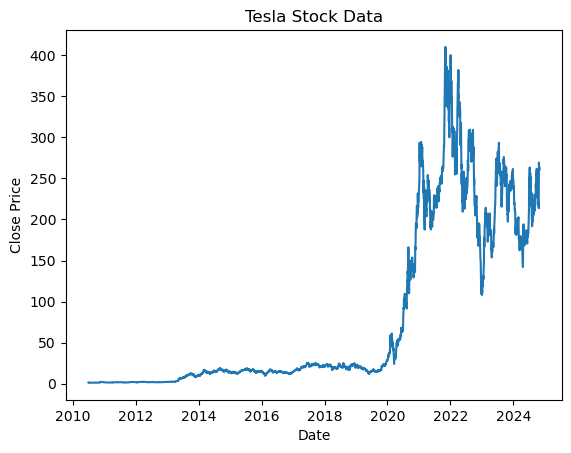

In [42]:
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_data["Date"] = tesla_data["Date"].dt.strftime("%Y-%m-%d")
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

def make_graph(data, title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(data["Date"], data["Close"])
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.show()
    
make_graph(tesla_data, "Tesla Stock Data")

## Question 6: Plot GameStop Stock Data

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

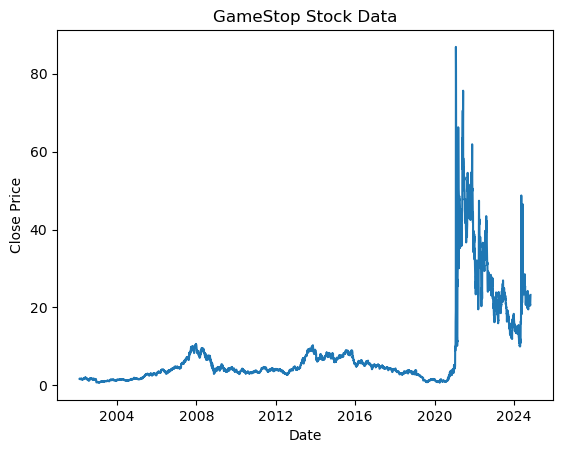

In [43]:
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_data["Date"] = gme_data["Date"].dt.strftime("%Y-%m-%d")
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

make_graph(gme_data, "GameStop Stock Data")